## Introducción a la regresión

In [60]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import lec5_graphs as gfx
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize']= (10, 6)

In [62]:
df = pd.read_csv('earnings.csv').drop('Unnamed: 0', axis =1)
df.sample()

,earn,height1,height2,sex,race,hisp,ed,yearbn,height,age,age_category,eth,male
75,26000.0,5,6,2,1,2,16,63,66,27,1,3,0


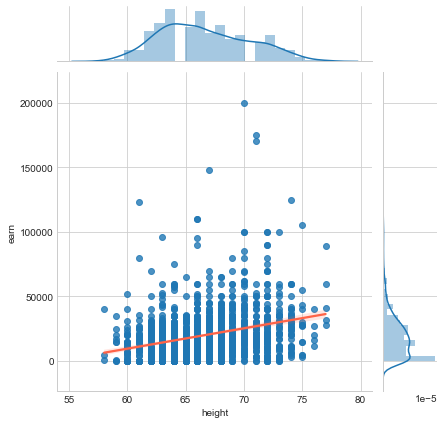

In [63]:
sns.jointplot(df['height'], df['earn'], kind = 'reg', line_kws = {'color': 'tomato'})

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1374 entries, 0 to 1373
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   earn          1374 non-null   float64
 1   height1       1374 non-null   int64  
 2   height2       1374 non-null   int64  
 3   sex           1374 non-null   int64  
 4   race          1374 non-null   int64  
 5   hisp          1374 non-null   int64  
 6   ed            1374 non-null   int64  
 7   yearbn        1374 non-null   int64  
 8   height        1374 non-null   int64  
 9   age           1374 non-null   int64  
 10  age_category  1374 non-null   int64  
 11  eth           1374 non-null   int64  
 12  male          1374 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 139.7 KB


In [65]:
#Separamos las variables que son categoricas vs las variables continuas
categorical_columns = ['sex', 'race', 'hisp', 'age_category', 'eth', 'male']

for cat in categorical_columns:
    print('\n', cat)
    print(df[cat].value_counts())
    print(df[cat].value_counts('%'))


 sex
2    856
1    518
Name: sex, dtype: int64
2    0.622999
1    0.377001
Name: sex, dtype: float64

 race
1    1216
2     126
3      17
4      10
9       5
Name: race, dtype: int64
1    0.885007
2    0.091703
3    0.012373
4    0.007278
9    0.003639
Name: race, dtype: float64

 hisp
2    1294
1      80
Name: hisp, dtype: int64
2    0.941776
1    0.058224
Name: hisp, dtype: float64

 age_category
1    564
2    436
3    374
Name: age_category, dtype: int64
1    0.410480
2    0.317322
3    0.272198
Name: age_category, dtype: float64

 eth
3    1144
1     126
2      77
4      27
Name: eth, dtype: int64
3    0.832606
1    0.091703
2    0.056041
4    0.019651
Name: eth, dtype: float64

 male
0    856
1    518
Name: male, dtype: int64
0    0.622999
1    0.377001
Name: male, dtype: float64


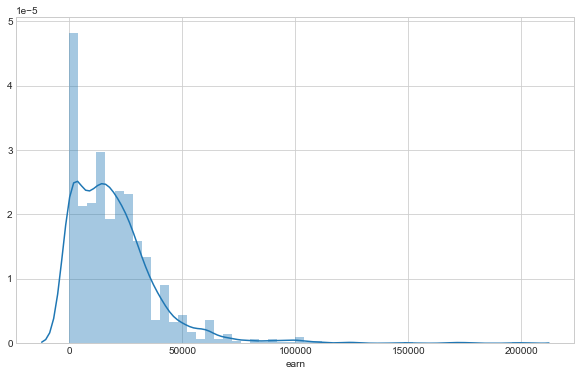

In [66]:
sns.distplot(df['earn'])
#En promedio los individuos tienden a concentrarse por debajo de la muestra

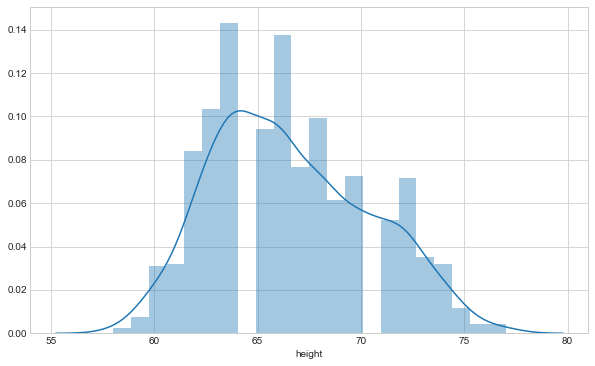

In [67]:
sns.distplot(df['height'])

In [68]:
import statsmodels.api as sn
import statsmodels.formula.api as snf

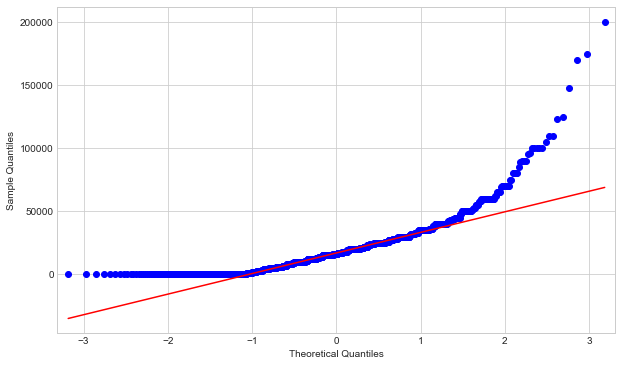

In [69]:
sn.qqplot(df['earn'], line = 'q');
#cuando responde a la normalidad, las observaciones se deberia posisionar en la recta
#Observamos que los datos extremos poseen desviaciones

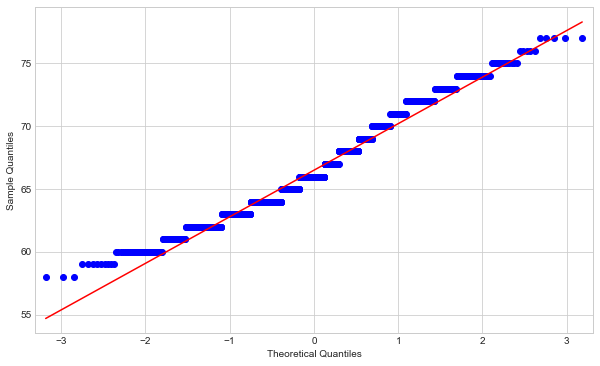

In [70]:
sn.qqplot(df['height'], line = 'q');
#Tiende a acomplarse de mejor manera

In [71]:
modelo = snf.ols('earn ~ height', df) 
#la función buscará internamente la representación de las columnas y  ~ x en el df

In [72]:
modelo = modelo.fit() 
#Inferimos los parametros intercepto y pendiente

In [73]:
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   earn   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     138.4
Date:                Tue, 10 Nov 2020   Prob (F-statistic):           1.65e-30
Time:                        19:05:12   Log-Likelihood:                -15475.
No. Observations:                1374   AIC:                         3.095e+04
Df Residuals:                    1372   BIC:                         3.097e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8.487e+04   8926.986     -9.507      0.000   -1.02e+05   -6.74e+04
height      1574.4103    133.829     11.764      0.000    1311.879    1836.942
==============================================================================
Omnibus:                      868.584   Durbin-Watson:                   1.903
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13733.247
Skew:                           2.677   Prob(JB):                         0.00
Kurtosis:                      17.533   Cond. No.                     1.17e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

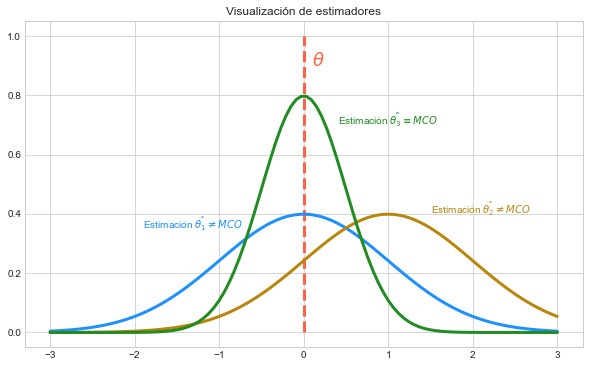

In [74]:
#Validez de la regresión
gfx.gauss_markov()

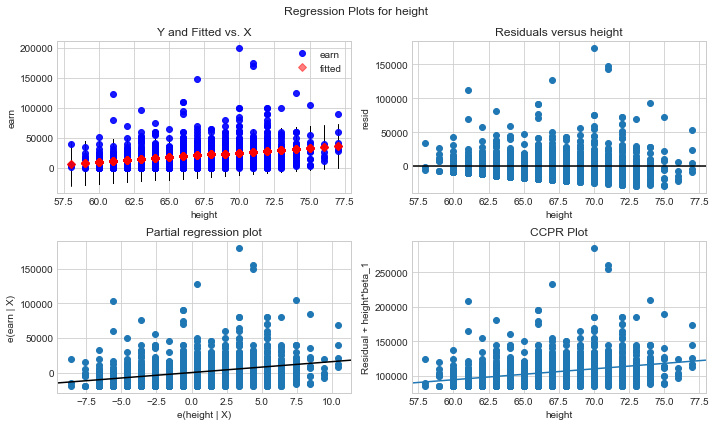

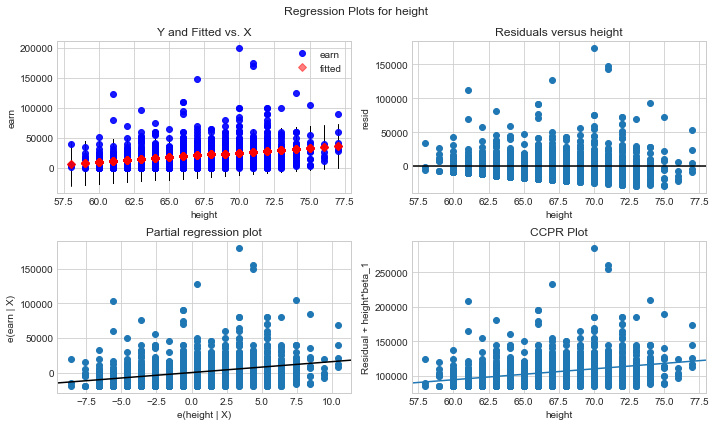

In [75]:
sn.graphics.plot_regress_exog(modelo, 'height')

## Variables independientes binarias

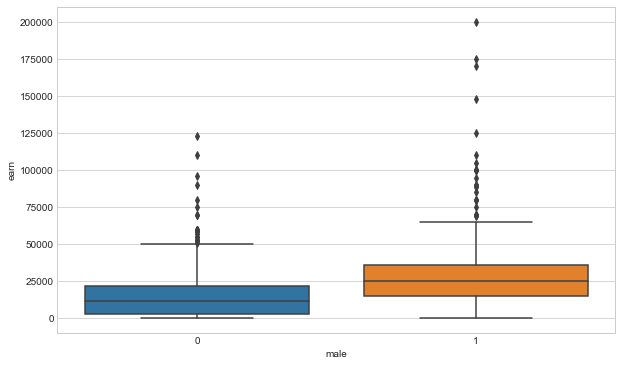

In [76]:
sns.boxplot(x=df['male'], y=df['earn']);
#La media y la mediana, la distribución es mas variante para mujeres

In [77]:
modelo_binario_male = snf.ols( 'earn ~ male',df).fit()
modelo_binario_male.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   earn   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     194.5
Date:                Tue, 10 Nov 2020   Prob (F-statistic):           1.95e-41
Time:                        19:05:15   Log-Likelihood:                -15450.
No. Observations:                1374   AIC:                         3.090e+04
Df Residuals:                    1372   BIC:                         3.092e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.456e+04    632.986     23.004      0.000    1.33e+04    1.58e+04
male        1.438e+04   1030.915     13.946      0.000    1.24e+04    1.64e+04
==============================================================================
Omnibus:                      864.521   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13531.216
Skew:                           2.664   Prob(JB):                         0.00
Kurtosis:                      17.421   Cond. No.                         2.43
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
earn_female = 14560 #Lo que recibe una mujer, intercepto 0 
diff_male = 14380 #Pendiente, diferencia al incrementar 1, es decir hombre
earn_female + diff_male #Lo que recibe un hombre

28940

## Variables independientes polinomiales

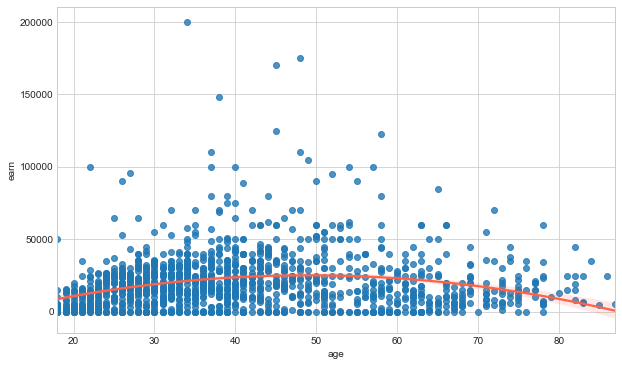

In [84]:
sns.regplot(df['age'], df['earn'],
           order = 2, line_kws = {'color': 'tomato'} )
#Al principio el individuo aumenta su ingreso cuando aumenta la edad
#Pero al aumentar la edad pasa un momento en que comienza a disminuir el ingreso


In [56]:
df['age_sq'] = df['age']**2

In [59]:
modelo_cuadratico_edad = snf.ols('earn ~ age + age_sq', df).fit()
modelo_cuadratico_edad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   earn   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     41.06
Date:                Tue, 10 Nov 2020   Prob (F-statistic):           4.80e-18
Time:                        06:13:46   Log-Likelihood:                -15501.
No. Observations:                1374   AIC:                         3.101e+04
Df Residuals:                    1371   BIC:                         3.102e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.566e+04   3975.144     -3.940      0.000   -2.35e+04   -7863.055
age         1664.1728    184.765      9.007      0.000    1301.719    2026.626
age_sq       -16.9734      1.956     -8.678      0.000     -20.810     -13.137
==============================================================================
Omnibus:                      843.307   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12732.413
Skew:                           2.585   Prob(JB):                         0.00
Kurtosis:                      16.988   Cond. No.                     1.86e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.86e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Multiples variables independientes

In [87]:
modelo_2 = snf.ols('earn ~ age + male', df).fit()
modelo_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   earn   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     105.2
Date:                Tue, 10 Nov 2020   Prob (F-statistic):           3.24e-43
Time:                        19:16:11   Log-Likelihood:                -15443.
No. Observations:                1374   AIC:                         3.089e+04
Df Residuals:                    1371   BIC:                         3.091e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9517.0050   1488.355      6.394      0.000    6597.305    1.24e+04
age          120.0427     32.090      3.741      0.000      57.093     182.993
male        1.465e+04   1028.734     14.244      0.000    1.26e+04    1.67e+04
==============================================================================
Omnibus:                      866.933   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13792.663
Skew:                           2.668   Prob(JB):                         0.00
Kurtosis:                      17.576   Cond. No.                         137.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
modelo_2 = snf.ols('earn ~ ed + male', df).fit()
modelo_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   earn   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                     206.4
Date:                Tue, 10 Nov 2020   Prob (F-statistic):           4.42e-79
Time:                        19:16:34   Log-Likelihood:                -15361.
No. Observations:                1374   AIC:                         3.073e+04
Df Residuals:                    1371   BIC:                         3.074e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.064e+04   2613.174     -7.898      0.000   -2.58e+04   -1.55e+04
ed          2660.1759    192.327     13.832      0.000    2282.889    3037.462
male        1.352e+04    968.064     13.968      0.000    1.16e+04    1.54e+04
==============================================================================
Omnibus:                      829.868   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12917.525
Skew:                           2.515   Prob(JB):                         0.00
Kurtosis:                      17.154   Cond. No.                         76.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
df_dummy = df.copy()
df_dummy

,earn,height1,height2,sex,race,hisp,ed,yearbn,height,age,age_category,eth,male
0,50000.0,6,2,1,1,2,16,45,74,45,2,3,1
1,60000.0,5,6,2,1,2,16,32,66,58,3,3,0
2,30000.0,5,4,2,1,2,16,61,64,29,1,3,0
3,51000.0,5,3,2,1,2,17,51,63,39,2,3,0
4,9000.0,5,4,2,1,2,15,64,64,26,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1369,19000.0,6,0,1,1,2,12,61,72,29,1,3,1
1370,15000.0,5,1,2,1,2,18,8,61,82,3,3,0
1371,8000.0,5,4,2,1,2,12,57,64,33,1,3,0
1372,60000.0,6,0,1,1,2,12,40,72,50,3,3,1


In [93]:
modelo_3 = snf.ols('earn ~ ed + male', df_dummy).fit()
df_dummy['yath'] = modelo_3.predict()
df_dummy.head()

,earn,height1,height2,sex,race,hisp,ed,yearbn,height,age,age_category,eth,male,yath
0,50000.0,6,2,1,1,2,16,45,74,45,2,3,1,35444.862717
1,60000.0,5,6,2,1,2,16,32,66,58,3,3,0,21923.423771
2,30000.0,5,4,2,1,2,16,61,64,29,1,3,0,21923.423771
3,51000.0,5,3,2,1,2,17,51,63,39,2,3,0,24583.599688
4,9000.0,5,4,2,1,2,15,64,64,26,1,3,0,19263.247854


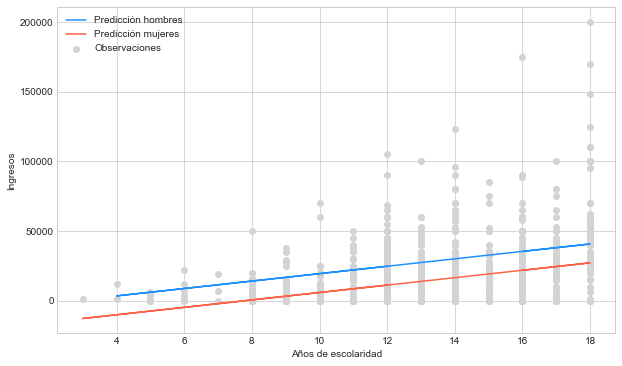

In [101]:
plt.scatter(df_dummy['ed'], df_dummy['earn'], color = 'lightgrey', label = 'Observaciones')
plt.plot(df_dummy.query('male == 1')['ed'],
        df_dummy.query('male == 1')['yath'],
        color = 'dodgerblue', label = 'Predicción hombres')
plt.plot(df_dummy.query('male == 0')['ed'],
        df_dummy.query('male == 0')['yath'],
        color = 'tomato', label = 'Predicción mujeres')
plt.xlabel('Años de escolaridad')
plt.ylabel('Ingresos')
plt.legend()